In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import explore 

import warnings
warnings.filterwarnings("ignore")

Using cached csv


### Exploration Exercises

#### 1.) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
# Acquire the Telco data from wrangle.py
df = explore.get_telco_data()

Using cached csv


In [3]:
explore.clean_telco(df)

,internet_type,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,...,month_to_month,one_year,two_year,dsl_int,fiber_int,no_internet,bt_auto,cc_auto,elecc_nonauto,mailc_nonauto
0,1,0002-ORFBO,0,9,No,65.60,593.30,DSL,One year,Mailed check,...,0,1,0,1,0,0,0,0,0,1
1,1,0003-MKNFE,0,9,Yes,59.90,542.40,DSL,Month-to-month,Mailed check,...,1,0,0,1,0,0,0,0,0,1
2,2,0004-TLHLJ,0,4,No,73.90,280.85,Fiber optic,Month-to-month,Electronic check,...,1,0,0,0,1,0,0,0,1,0
3,2,0011-IGKFF,1,13,No,98.00,1237.85,Fiber optic,Month-to-month,Electronic check,...,1,0,0,0,1,0,0,0,1,0
4,2,0013-EXCHZ,1,3,No,83.90,267.40,Fiber optic,Month-to-month,Mailed check,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,9987-LUTYD,0,13,No,55.15,742.90,DSL,One year,Mailed check,...,0,1,0,1,0,0,0,0,0,1
7039,2,9992-RRAMN,0,22,Yes,85.10,1873.70,Fiber optic,Month-to-month,Electronic check,...,1,0,0,0,1,0,0,0,1,0
7040,1,9992-UJOEL,0,2,No,50.30,92.75,DSL,Month-to-month,Mailed check,...,1,0,0,1,0,0,0,0,0,1
7041,1,9993-LHIEB,0,67,No,67.85,4627.65,DSL,Two year,Mailed check,...,0,0,1,1,0,0,0,0,0,1


In [4]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check


In [5]:
train, validate, test = explore.prep_telco(df)

In [6]:
train.shape, validate.shape, train.shape

((3943, 41), (1691, 41), (3943, 41))

#### 2.) Write a function named 'plot_variable_pairs' that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [7]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check


In [8]:
# Take a look at columns of all available continuous columns
con_cols = ['tenure', 'monthly_charges', 'total_charges']

In [9]:
# Create a function to use that takes in continuous columns and plots 
# relationships along the regression line
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner = True)

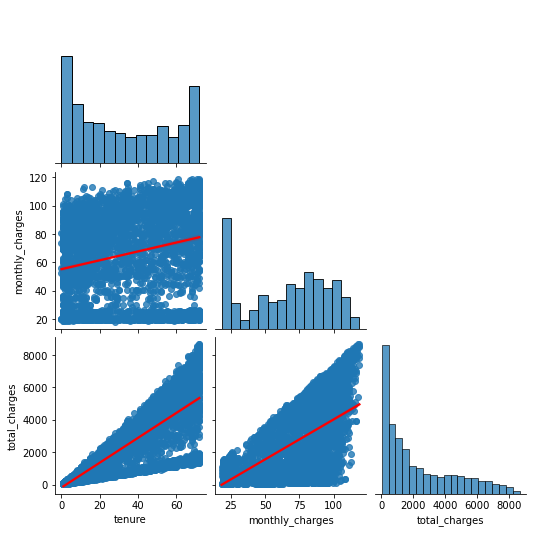

In [10]:
plot_variable_pairs(train[con_cols])

#### 3.) Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [12]:
def months_to_years(df):
    df['tenure_years'] = round(df.tenure/12,0).astype(int)
    return df

months_to_years(train).head()

,internet_type,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,...,one_year,two_year,dsl_int,fiber_int,no_internet,bt_auto,cc_auto,elecc_nonauto,mailc_nonauto,tenure_years
5310,1,7503-MIOGA,1,72,Yes,89.85,6697.35,DSL,Two year,Bank transfer (automatic),...,0,1,1,0,0,1,0,0,0,6
3790,1,5329-KRDTM,1,72,Yes,77.35,5396.25,DSL,Two year,Credit card (automatic),...,0,1,1,0,0,0,1,0,0,6
4398,2,6199-IWKGC,1,46,Yes,100.25,4753.85,Fiber optic,One year,Electronic check,...,1,0,0,1,0,0,0,1,0,4
2635,1,3748-FVMZZ,0,4,No phone service,40.05,162.45,DSL,Month-to-month,Electronic check,...,0,0,1,0,0,0,0,1,0,0
2986,1,4280-DLSHD,0,8,No,54.75,445.85,DSL,Month-to-month,Mailed check,...,0,0,1,0,0,0,0,0,1,1


#### 4.) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [13]:
df.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

In [14]:
def plot_categorical_and_continuous_vars(df, 
                                         cat_cols, 
                                         con_cols):
    for con in con_cols:
        for cat in cat_cols:
            plt.subplot(131)
            sns.barplot(x=cat,y=con, data=df)
            plt.axhline(df[con].mean())
            
            plt.subplot(132)
            sns.relplot(x=cat,y=con, data=df)
            plt.axhline(df[con].mean())
            
            plt.subplot(133)
            sns.boxplot(x=cat,y=con, data=df)
            plt.axhline(df[con].mean())

In [15]:
df.head(1)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check


In [23]:
cat_cols = ['senior_citizen', 'tenure']
con_cols = ['monthly_charges', 'total_charges']


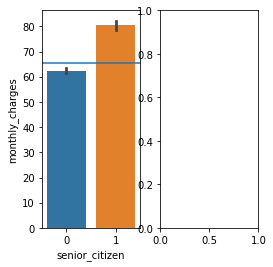

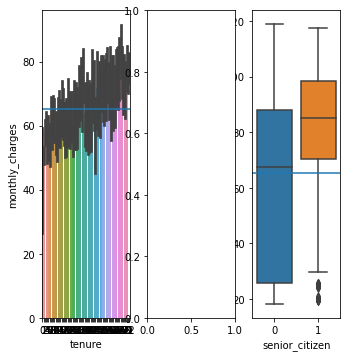

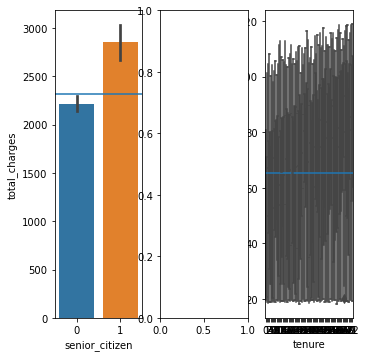

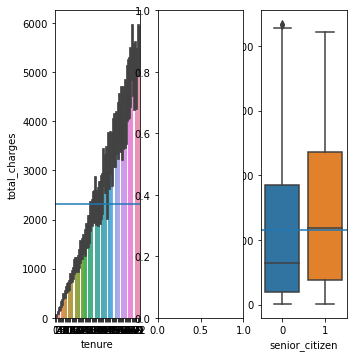

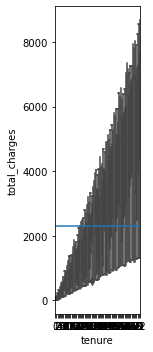

In [24]:
plot_categorical_and_continuous_vars(train, cat_cols, con_cols)

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

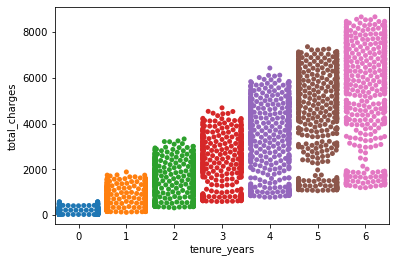

In [25]:
sns.swarmplot(x = 'tenure_years',
            y = 'total_charges',
            data = train)